# Biodiversity Analysis

In [149]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [150]:
observations = pd.read_csv("observations.csv")
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [151]:
species = pd.read_csv("species_info.csv")
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### Exploring data

In [152]:
#inspect the data
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [153]:
#inspect the data
print(f"observations shape: {observations.shape}")

observations shape: (23296, 3)


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [154]:
#inspect the data, nunique scentific names
print(f"Number of unique scientific names : {observations.scientific_name.nunique()}")

Number of unique scientific names : 5541


In [155]:
#inspect the data, nunique park names
print(f"Number of Parks : {observations.park_name.nunique()}")
print(f"Names of Parks : {observations.park_name.unique()}")

Number of Parks : 4
Names of Parks : ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [156]:
#inspect the data, nunique park names
print(f"Number of Observations in the last 7 days : {observations.observations.sum()}")

Number of Observations in the last 7 days : 3314739


### Data characteristics - Observations
- The `observations df` has 23, 296 entries and 3 columns.
- There are 4 unique parks
- With 5541 unique scientific names sparsed over the 4 parks.

## Species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [157]:
print(f"species shape: {species.shape}")

species shape: (5824, 4)


In [158]:
#inspect the df
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [159]:
#inspecting conservation status
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Why would we have species categorised as "NaN"?
That's because these speces are not under any conservation status.

In [160]:
print(species.groupby("conservation_status").size())
print(f"nan values: {species.conservation_status.isna().sum()} ")

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
nan values: 5633 


In [161]:
#inspect the df
print(f"Names of categories: {species.category.unique()}")

Names of categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [162]:
# we can go deeper and see how many animals we haver per category
# size of categories
size = species.groupby("category").size()
print("Size of Species Categories", size)

Size of Species Categories category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


### Data characteristics - Species
- The `species df` has 5,824 296 entries and 4 columns.
- With "5" conservation status, nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'
- There are 7 categories, 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'
    The most dominant being "Vascular Plants" where "Reptile" is the one with the fewest.

### Data Cleaning

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [165]:
species['conservation_status'] = species['conservation_status'].replace(np.nan, "No Intervention")
print(species.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


In [167]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

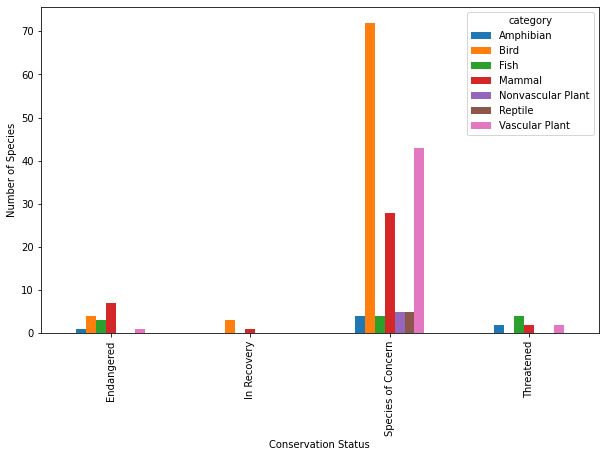

In [179]:
#plot conservation status
conservationCategory.plot(kind="bar", figsize=(10,6))
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")

In [180]:
#is protected
species["is_protected"] = species["conservation_status"] != "No Intervention"
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [192]:
protection = species.groupby(["category", "is_protected"])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected',
    index='category',
    values='scientific_name')\
    .reset_index()

protection.columns = ["category", "not_protected", "protected"]
protection

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [198]:
#transform to percentages
protection["percent_protected"] = protection.protected / \
                                    (protection.protected + protection.not_protected) * 100 
protection

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


[Text(0, 0, 'Not Protected'), Text(1, 0, 'Protected')]

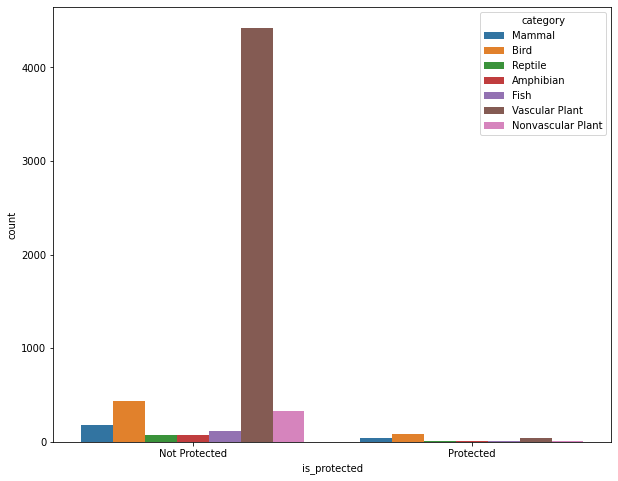

In [209]:
ax = plt.figure(figsize=(10,8))
ax = sns.countplot(x=species.is_protected,hue = species.category)
ax.set_xticklabels(["Not Protected", "Protected"])

## Statistical Significance